# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

city_name = []
city_number = []
country_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloud_coverage = []
wind_speed = []
city_datetime = []

x = -1

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)



611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
for city in cities[:50]:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    #print(query_url)
    
    time.sleep(1)  #sleep 1 second between calls
    
    try:
        
        #get data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_number.append(weather_json['id'])
        city_name.append(weather_json['name'])
        country_name.append(weather_json['sys']['country'])
        latitude.append(weather_json['coord']['lat'])
        longitude.append(weather_json['coord']['lon'])
        temperature.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloud_coverage.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        city_datetime.append(weather_json['dt'])
        x = x + 1
        print(f'City Number: {city_number[x]} City Name: {city_name[x]}')

    except:
        
        print("city not found")





City Number: 4030556 City Name: Rikitea
City Number: 1502073 City Name: Krasnosel'kup
City Number: 5563839 City Name: Fortuna
City Number: 1504489 City Name: Karasuk
City Number: 2173323 City Name: Bundaberg
City Number: 3448903 City Name: São João da Barra
City Number: 2635881 City Name: Thurso
City Number: 2074865 City Name: Carnarvon
City Number: 3579925 City Name: St. George's
City Number: 3423146 City Name: Ilulissat
city not found
City Number: 2025241 City Name: Churapcha
City Number: 935215 City Name: Saint-Philippe
City Number: 3659578 City Name: Cayambe
City Number: 6185377 City Name: Yellowknife
City Number: 5282297 City Name: Bethel
City Number: 2121385 City Name: Severo-Kuril'sk
City Number: 6201424 City Name: Mataura
City Number: 4035715 City Name: Avarua
City Number: 2656847 City Name: Atherton
City Number: 3421719 City Name: Narsaq
City Number: 1529376 City Name: Korla
City Number: 2294915 City Name: Takoradze
City Number: 4020109 City Name: Atuona
City Number: 3424607 C

In [5]:
print(city_name, city_number, country_name, latitude, longitude, temperature, humidity, cloud_coverage, wind_speed, city_datetime)

['Rikitea', "Krasnosel'kup", 'Fortuna', 'Karasuk', 'Bundaberg', 'São João da Barra', 'Thurso', 'Carnarvon', "St. George's", 'Ilulissat', 'Churapcha', 'Saint-Philippe', 'Cayambe', 'Yellowknife', 'Bethel', "Severo-Kuril'sk", 'Mataura', 'Avarua', 'Atherton', 'Narsaq', 'Korla', 'Takoradze', 'Atuona', 'Tasiilaq', 'Fuling', 'Hasaki', 'Busselton', 'Hobart', 'Cockburn Town', 'Hermanus', 'Puerto Peñasco', 'Tiksi', 'Pangody', 'Qaqortoq', 'Ushuaia', 'Laguna', 'Cape Town', 'Katherine', 'East London', 'Salinópolis', 'Ribeira Grande', 'Punta Arenas', 'Grindavik', 'Brae', 'Puerto Ayora', 'Provideniya', 'Douglas', 'Tuktoyaktuk'] [4030556, 1502073, 5563839, 1504489, 2173323, 3448903, 2635881, 2074865, 3579925, 3423146, 2025241, 935215, 3659578, 6185377, 5282297, 2121385, 6201424, 4035715, 2656847, 3421719, 1529376, 2294915, 4020109, 3424607, 1810979, 2112802, 2075265, 2163355, 3576994, 3366880, 3991347, 2015306, 1495626, 3420846, 3833367, 5364271, 3369157, 2068655, 1006984, 3389822, 3372707, 3874787, 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_results = pd.DataFrame({"City Name" : city_name,
                              "City Number": city_number,
                              "City Country": country_name,
                              "Latitude" : latitude,
                              "Longitude" : longitude,
                              "Max Temperature" : temperature,
                              "Humidity" : humidity,
                              "Cloud Coverage" : cloud_coverage,
                              "Wind Speed" : wind_speed,
                              "City Datetime" : city_datetime})

city_results.to_csv("city_results.cvs", encoding = "utf-8", index = False)

In [7]:
city_results.head(20)

,City Name,City Number,City Country,Latitude,Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Datetime
0,Rikitea,4030556,PF,-23.1203,-134.9692,79.48,76,42,11.99,1613249059
1,Krasnosel'kup,1502073,RU,65.7000,82.4667,-33.18,82,45,7.65,1613249061
2,Fortuna,5563839,US,40.5982,-124.1573,55.00,76,75,8.05,1613249062
3,Karasuk,1504489,RU,53.7377,78.0403,7.47,95,100,10.45,1613249063
4,Bundaberg,2173323,AU,-24.8500,152.3500,77.00,78,40,9.22,1613249064
5,São João da Barra,3448903,BR,-21.6403,-41.0511,80.60,74,0,18.41,1613249003
6,Thurso,2635881,GB,58.5927,-3.5259,35.60,60,100,31.07,1613249066
7,Carnarvon,2074865,AU,-24.8667,113.6333,77.00,100,39,10.36,1613249067
8,St. George's,3579925,GD,12.0564,-61.7485,84.20,65,75,24.16,1613249068
9,Ilulissat,3423146,GL,69.2167,-51.1000,17.60,79,75,16.11,1613249069


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humid_cities = []

#  Get the indices of cities that have humidity over 100%.
#get a list of cities that have humidity < 100
humid_cities = city_results[city_results["Humidity"] > 100].index

print(humid_cities)


Int64Index([], dtype='int64')


In [9]:
clean_city_data = city_results.drop(humid_cities,inplace = False)

clean_city_data.head()

,City Name,City Number,City Country,Latitude,Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Datetime
0,Rikitea,4030556,PF,-23.1203,-134.9692,79.48,76,42,11.99,1613249059
1,Krasnosel'kup,1502073,RU,65.7000,82.4667,-33.18,82,45,7.65,1613249061
2,Fortuna,5563839,US,40.5982,-124.1573,55.00,76,75,8.05,1613249062
3,Karasuk,1504489,RU,53.7377,78.0403,7.47,95,100,10.45,1613249063
4,Bundaberg,2173323,AU,-24.8500,152.3500,77.00,78,40,9.22,1613249064


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
#retrieve the Temperature that will be used each time
latitude = clean_city_data["Latitude"]


## Latitude vs. Temperature Plot

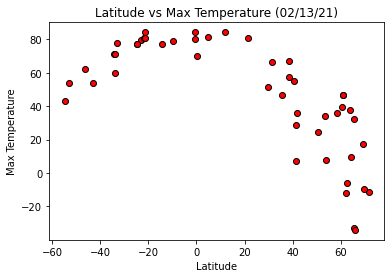

In [11]:
temperature = clean_city_data["Max Temperature"]

#using matplotlib
plt.scatter(latitude, temperature, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(('Latitude vs Max Temperature (%s)' % time.strftime("%x")))
plt.savefig("lat_vs_max_temp", bbox_inches='tight')

plt.show()

#the code is showing that there is a direct corellation between the latitude and the max temperature
#the higher the latitued the lower the max temperature

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

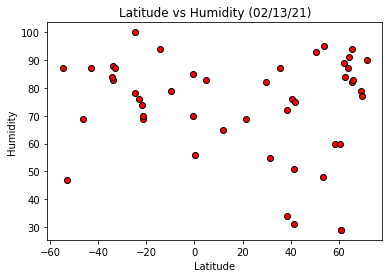

In [12]:
humidity = clean_city_data["Humidity"]

plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(('Latitude vs Humidity (%s)' % time.strftime("%x")))
plt.savefig("lat_vs_humidity", bbox_inches='tight')

plt.show

#there is not a corelation between the latitude and humidity

## Latitude vs. Cloud Coverage Plot

<function matplotlib.pyplot.show(*args, **kw)>

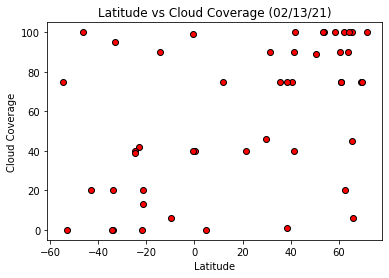

In [13]:
cloud_coverage = clean_city_data["Cloud Coverage"]

plt.scatter(latitude, cloud_coverage, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage')
plt.title(('Latitude vs Cloud Coverage (%s)' % time.strftime("%x")))
plt.savefig("lat_vs_cloud_coverage", bbox_inches='tight')

plt.show

#there is not a corelation between the latitude and cloudcoverage

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

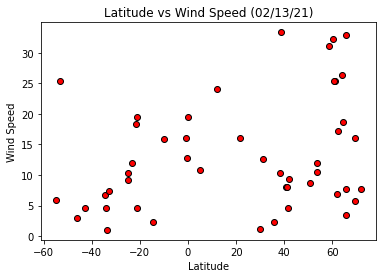

In [14]:
wind_speed = clean_city_data["Wind Speed"]

plt.scatter(latitude, wind_speed, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(('Latitude vs Wind Speed (%s)' % time.strftime("%x")))
plt.savefig("lat_vs_wind_speed", bbox_inches='tight')

plt.show

#there is not a corelation between the latitude and wind speed

## Linear Regression

In [15]:
#the starter code had from scipy.stats import linregress

w_slope, w_intercept, w_cap_r, w_cap_p, w_cap_std_err = linregress(latitude, humidity)


print(w_slope)

-0.06096986547430628


In [51]:
#function
# Add the linear regression equation and line to plot
def find_lin_reg(x_values, y_values, title, cordinates):
#x_values = housing_data['RM']
#y_values = housing_data['MEDV']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,cordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(ylabel)
    plt.title((title + '  (%s)' % time.strftime("%x")))
    plt.savefig('Finished')
    plt.show()

In [36]:
northern_data = clean_city_data.loc[clean_city_data["Latitude"]>= 0]
southern_data = clean_city_data.loc[clean_city_data["Latitude"]< 0]
southern_data.head()

,City Name,City Number,City Country,Latitude,Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Datetime
0,Rikitea,4030556,PF,-23.1203,-134.9692,79.48,76,42,11.99,1613249059
4,Bundaberg,2173323,AU,-24.8500,152.3500,77.00,78,40,9.22,1613249064
5,São João da Barra,3448903,BR,-21.6403,-41.0511,80.60,74,0,18.41,1613249003
7,Carnarvon,2074865,AU,-24.8667,113.6333,77.00,100,39,10.36,1613249067
11,Saint-Philippe,935215,RE,-21.3585,55.7679,80.60,69,20,19.57,1613249073


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

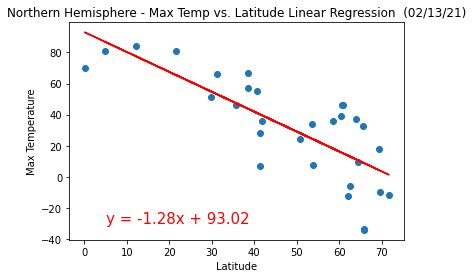

In [37]:
x_values = northern_data["Latitude"]
y_values = northern_data["Max Temperature"]
ylabel = "Max Temperature"
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
find_lin_reg(x_values, y_values, title, (5,-30))




####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

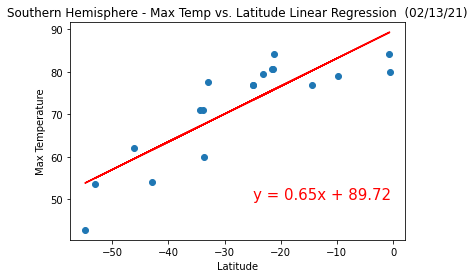

In [43]:
x_values = southern_data["Latitude"]
y_values = southern_data["Max Temperature"]
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"

find_lin_reg(x_values, y_values, title, (-25,50))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

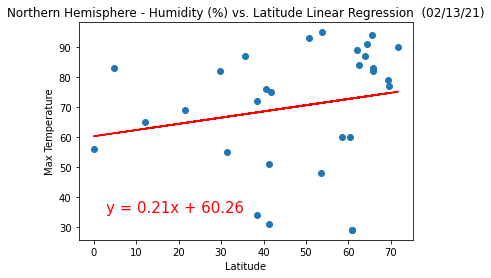

In [47]:
x_values = northern_data["Latitude"]
y_values = northern_data["Humidity"]
title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"

find_lin_reg(x_values, y_values, title, (3,35))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

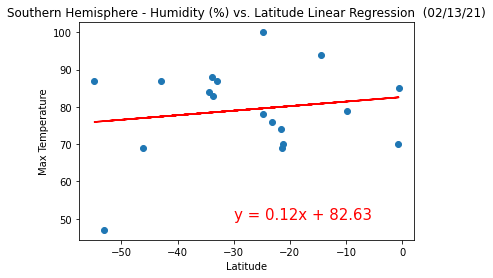

In [52]:
x_values = southern_data["Latitude"]
y_values = southern_data["Humidity"]
title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"

find_lin_reg(x_values, y_values, title, (-30,50))

####  Northern Hemisphere - Cloud Coverage (%) vs. Latitude Linear Regression

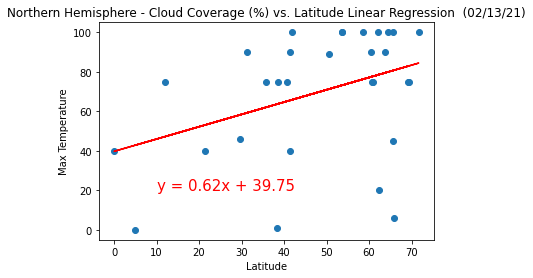

In [53]:
x_values = northern_data["Latitude"]
y_values = northern_data["Cloud Coverage"]
title = "Northern Hemisphere - Cloud Coverage (%) vs. Latitude Linear Regression"

find_lin_reg(x_values, y_values, title, (10,20))

####  Southern Hemisphere - Cloud Coverage (%) vs. Latitude Linear Regression

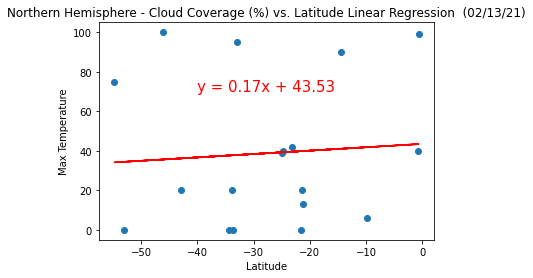

In [55]:
x_values = southern_data["Latitude"]
y_values = southern_data["Cloud Coverage"]
Title = "Southern Hemisphere - Cloud Coverage (%) vs. Latitude Linear Regression"

find_lin_reg(x_values, y_values, title, (-40,70))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

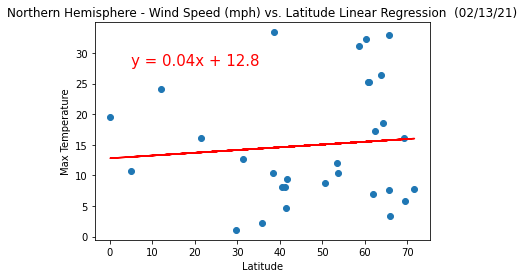

In [59]:
x_values = northern_data["Latitude"]
y_values = northern_data["Wind Speed"]
title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"

find_lin_reg(x_values, y_values, title, (5,28))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

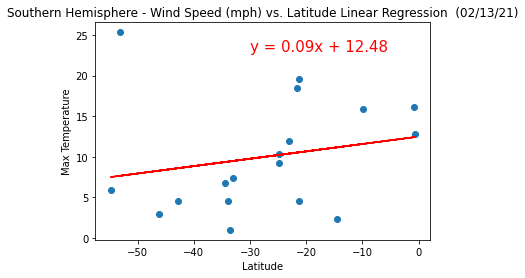

In [61]:
x_values = southern_data["Latitude"]
y_values = southern_data["Wind Speed"]
title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"

find_lin_reg(x_values, y_values, title, (-30, 23))